# ADIDAS SALES ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Adidas US Sales Datasets.xlsx')
print(df.head())

      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1   

In [4]:
print(df.describe())

        Retailer ID  Price per Unit   Units Sold    Total Sales  \
count  9.648000e+03     9648.000000  9648.000000    9648.000000   
mean   1.173850e+06       45.216625   256.930037   93273.437500   
std    2.636038e+04       14.705397   214.252030  141916.016727   
min    1.128299e+06        7.000000     0.000000       0.000000   
25%    1.185732e+06       35.000000   106.000000    4254.500000   
50%    1.185732e+06       45.000000   176.000000    9576.000000   
75%    1.185732e+06       55.000000   350.000000  150000.000000   
max    1.197831e+06      110.000000  1275.000000  825000.000000   

       Operating Profit  Operating Margin  
count       9648.000000       9648.000000  
mean       34425.244761          0.422991  
std        54193.113713          0.097197  
min            0.000000          0.100000  
25%         1921.752500          0.350000  
50%         4371.420000          0.410000  
75%        52062.500000          0.490000  
max       390000.000000          0.800000  


In [5]:
print(df.isnull().sum())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


# Sales Performance Analysis

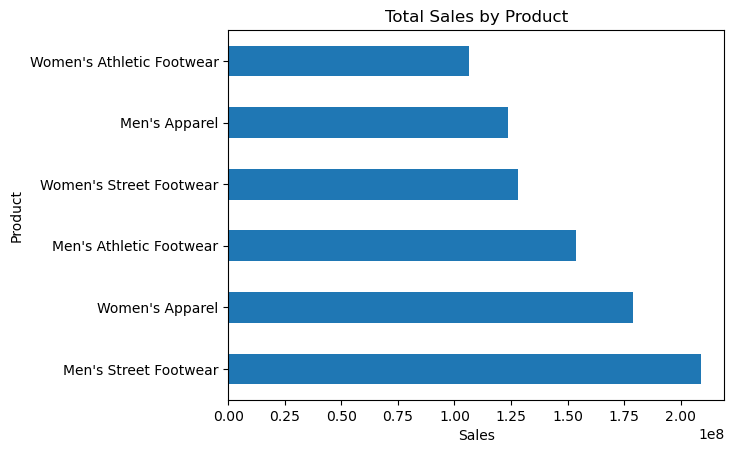

In [6]:
# Total sales by product
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sales_by_product.plot(kind='barh', title='Total Sales by Product')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()


# Regional Market Analysis

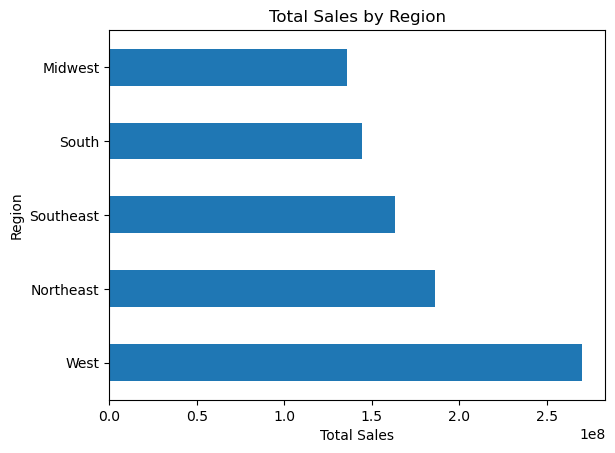

In [7]:
# Total sales by region
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
sales_by_region.plot(kind='barh', title='Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

# Profit Margin Analysis

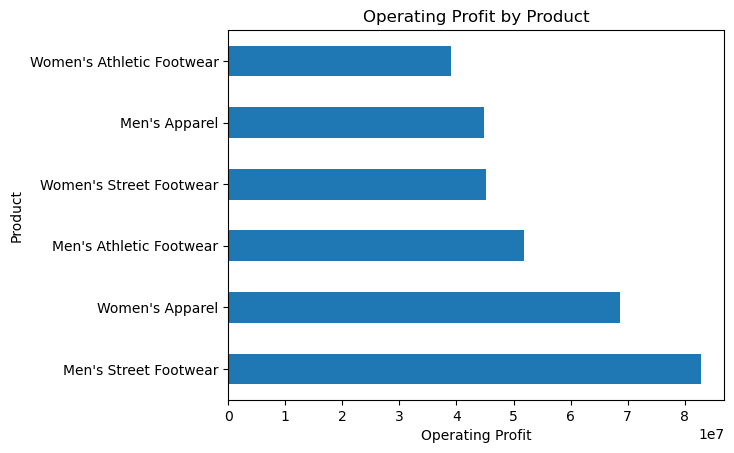

In [8]:
# Operating profit by product
profit_by_product = df.groupby('Product')['Operating Profit'].sum().sort_values(ascending=False)
profit_by_product.plot(kind='barh', title='Operating Profit by Product')
plt.xlabel('Operating Profit')
plt.ylabel('Product')
plt.show()

# Efficiency of Sales Methods

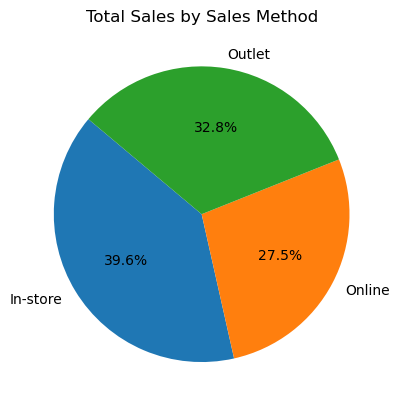

In [9]:
# Sales by method
sales_by_method = df.groupby('Sales Method')['Total Sales'].sum()
sales_by_method.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Sales Method')
plt.ylabel('')
plt.show()

# Price Optimization

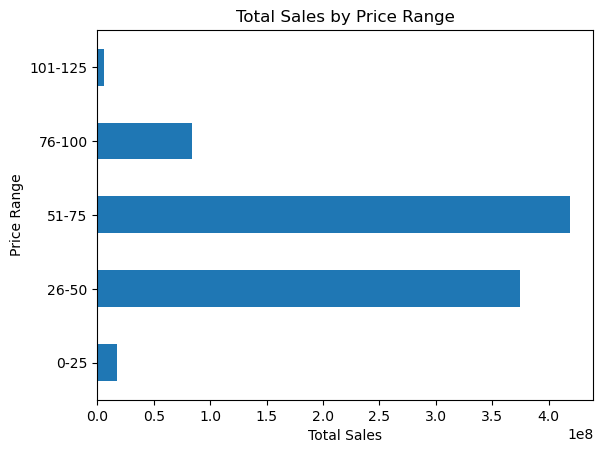

In [10]:
# Define price ranges
bins = [0, 25, 50, 75, 100, 125]
labels = ['0-25', '26-50', '51-75', '76-100', '101-125']
df['Price Range'] = pd.cut(df['Price per Unit'], bins=bins, labels=labels, include_lowest=True)

# Sales by price range
sales_by_price_range = df.groupby('Price Range')['Total Sales'].sum()
sales_by_price_range.plot(kind='barh', title='Total Sales by Price Range')
plt.xlabel('Total Sales')
plt.ylabel('Price Range')
plt.show()

# Product Portfolio Optimization

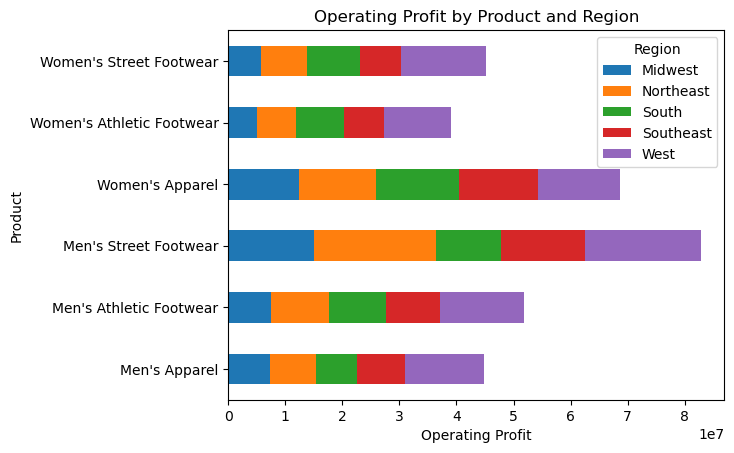

In [11]:
# Profit by product and region
profit_by_product_region = df.groupby(['Product', 'Region'])['Operating Profit'].sum().unstack()
profit_by_product_region.plot(kind='barh', stacked=True, title='Operating Profit by Product and Region')
plt.xlabel('Operating Profit')
plt.ylabel('Product')
plt.show()

# Market Expansion Opportunities

In [12]:
sales_by_state = df.groupby('State')['Total Sales'].sum().sort_values(ascending=False)
sales_by_city = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False)

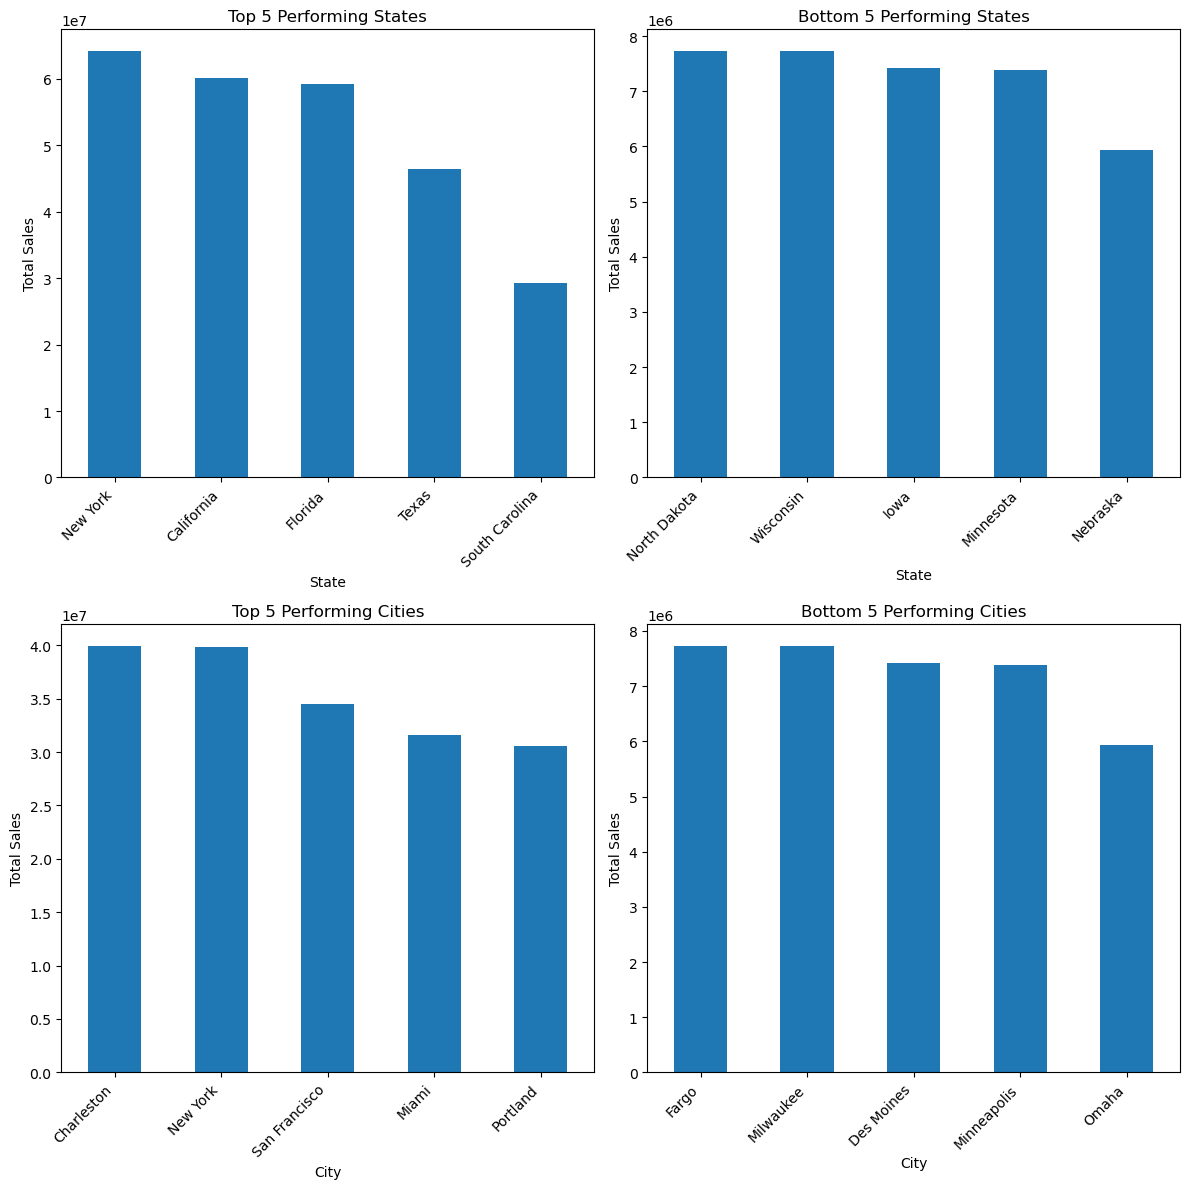

In [13]:
# Top performer's
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
titles = ['Top 5 Performing States', 'Bottom 5 Performing States',
          'Top 5 Performing Cities', 'Bottom 5 Performing Cities']
data = [sales_by_state.head(5), sales_by_state.tail(5),
        sales_by_city.head(5), sales_by_city.tail(5)]
for i, ax in enumerate(axes.flat):
    data[i].plot(kind='bar', ax=ax)
    ax.set_title(titles[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()


# Time Series Analysis

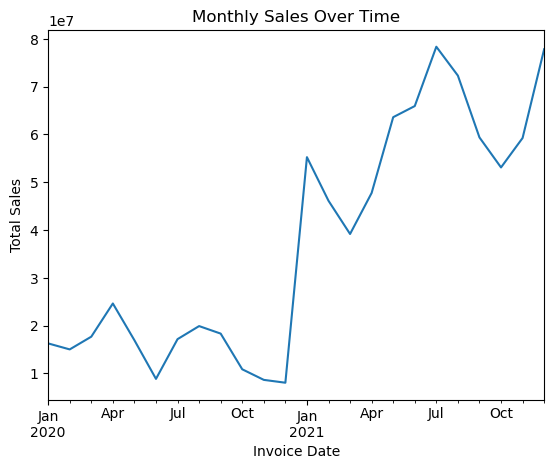

In [14]:
# Convert invoice date to datetime format and set as index
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.set_index('Invoice Date', inplace=True)

# Sales trend over time
df.resample('M')['Total Sales'].sum().plot(title='Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

In [15]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


17:48:37 - cmdstanpy - INFO - Chain [1] start processing
17:48:38 - cmdstanpy - INFO - Chain [1] done processing


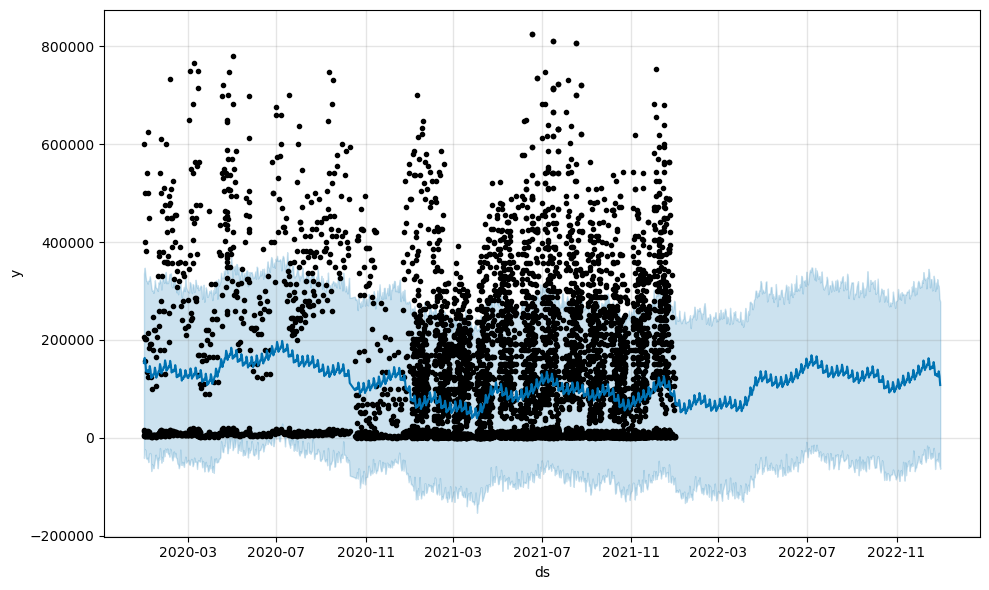

In [16]:
from prophet import Prophet

# Reset the index so that "Invoice Date" becomes a column
df_reset = df.reset_index()

# Now we rename the columns for Prophet
df_prophet = df_reset.rename(columns={'Invoice Date': 'ds', 'Total Sales': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model with df_prophet
model.fit(df_prophet)

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=365)

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)



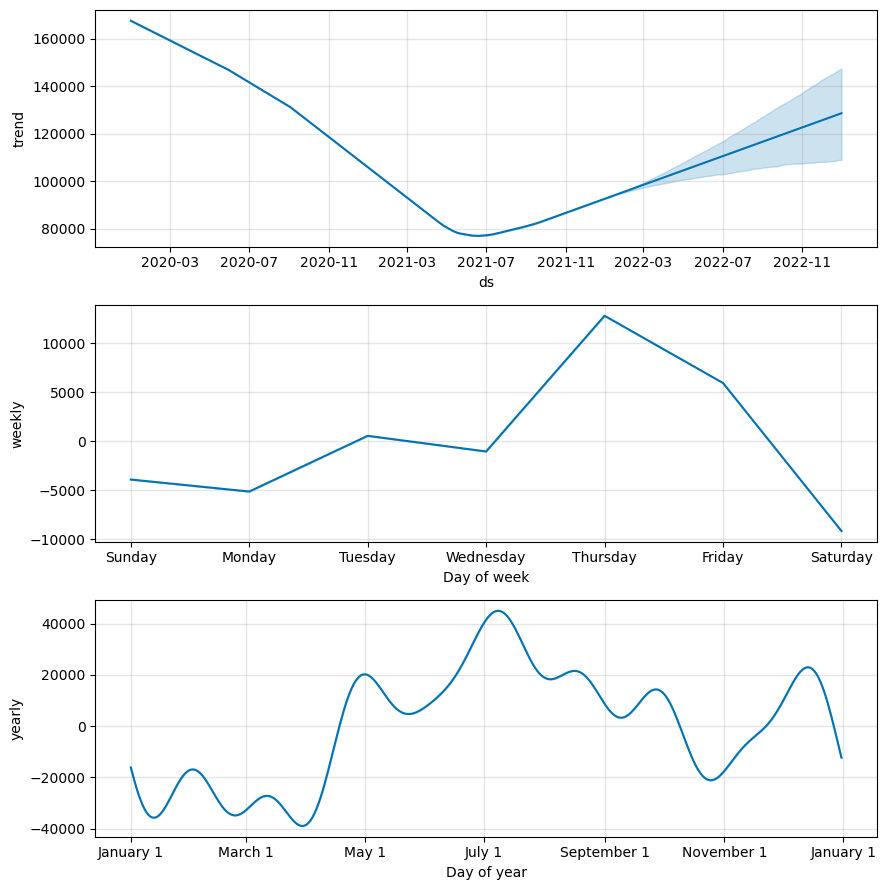

In [17]:
fig2 = model.plot_components(forecast)